In [1]:
# import sys
# !{sys.executable} -m pip install plotly

In [2]:
%config Completer.use_jedi = False # to enable auto complete

In [20]:
import pandas as pd
import logging
from seaborn import kdeplot
import matplotlib.pyplot as plt

In [4]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('Main_Churn_Perdictors')

In [5]:
orders_df = pd.read_csv('../data/machine_learning_challenge_order_data.csv')
labeled_df = pd.read_csv('../data/machine_learning_challenge_labeled_data.csv')

In [6]:
orders_df.head()

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
0,000097eabfd9,2015-06-20,19,1.0,0,0.0,0.000,11.46960,5803498,20326,1779,30231,4356
1,0000e2c6d9be,2016-01-29,20,1.0,0,0.0,0.000,9.55800,239303498,76547,1619,30359,4356
2,000133bb597f,2017-02-26,19,1.0,0,0.0,0.493,5.93658,206463498,33833,1619,30359,4324
3,00018269939b,2017-02-05,17,1.0,0,0.0,0.493,9.82350,36613498,99315,1619,30359,4356
4,0001a00468a6,2015-08-04,19,1.0,0,0.0,0.493,5.15070,225853498,16456,1619,29463,4356


In [7]:
labeled_df.head()

,customer_id,is_returning_customer
0,000097eabfd9,0
1,0000e2c6d9be,0
2,000133bb597f,1
3,00018269939b,0
4,0001a00468a6,0


## Exploratory Data analysis:

### Overall data analysis

In [ ]:
plt.hist

array([[<AxesSubplot:title={'center':'order_hour'}>,
        <AxesSubplot:title={'center':'is_failed'}>],
       [<AxesSubplot:title={'center':'city_id'}>,
        <AxesSubplot:title={'center':'payment_id'}>],
       [<AxesSubplot:title={'center':'platform_id'}>,
        <AxesSubplot:title={'center':'customer_order_rank'}>]],
      dtype=object)

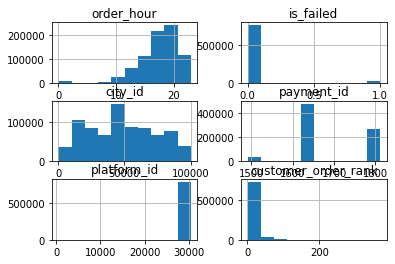

In [27]:
orders_df.hist(column=['order_hour','is_failed','city_id','payment_id','platform_id','customer_order_rank'])

Take aways
1. is_failed is heavily biased to 0
2. There is on dominant platfrom_ids

In [9]:
# verifying visuals numerically

In [10]:
logger.info(f"""order_df.is_failed normalized counts = \n{orders_df['is_failed'].value_counts(normalize = True)}""")
logger.info(f"""order_df.is_failed normalized counts = \n{orders_df['platform_id'].value_counts(normalize = True)}""")

INFO:Main_Churn_Perdictors:order_df.is_failed normalized counts = 
0    0.968514
1    0.031486
Name: is_failed, dtype: float64
INFO:Main_Churn_Perdictors:order_df.is_failed normalized counts = 
29463    0.307047
30231    0.275523
29815    0.202100
30359    0.131773
30391    0.031063
29751    0.024563
29495    0.014176
30423    0.008669
30199    0.002643
525      0.001391
30135    0.000753
22263    0.000295
22167    0.000004
22295    0.000001
Name: platform_id, dtype: float64


In [21]:
# KDE to plot continous variables
# function to plot given columns
# focus only on continous variables, as discreate have been analyzed via hist function
def kde_batch_numeric(df,columns):
    for col in columns:
        if isinstance(df[col][0],(float,int)):
            kdeplot(df[col]).set_title(col)
            plt.show()
        else:
            raise ValueError(f'Column {col} is not float or int')

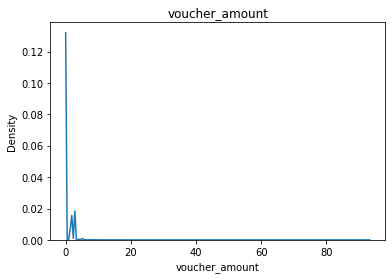

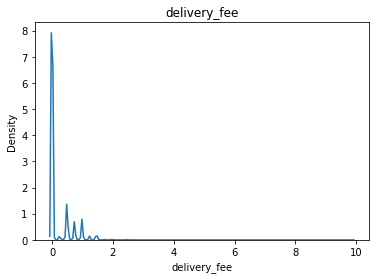

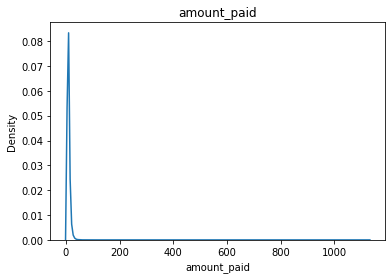

In [28]:
kde_batch_numeric(df=orders_df,columns=['voucher_amount','delivery_fee','amount_paid'])